In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_digits

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import roc_auc_score

# Загружаем набор рукописных цифр

In [9]:
digits = load_digits()

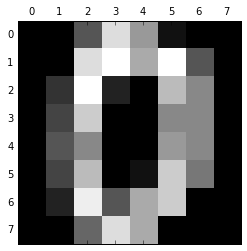

In [10]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

# Для начала научимся классифицировать 0 и 1

In [169]:
ones = digits.data[np.where(digits.target==1)[0]]

In [170]:
zeros = digits.data[np.where(digits.target==0)[0]]

In [171]:
data_set = np.concatenate([ones,zeros,twos])

In [172]:
target = np.concatenate([np.ones((ones.shape[0],1)),np.zeros((zeros.shape[0],1))])[:,0].T

In [173]:
ids = np.arange(target.shape[0])

In [174]:
np.random.shuffle(ids)

In [175]:
data_set = data_set[ids]
target = target[ids]

### разделяем набор данных на train и test

In [176]:
train_data_set, test_data_set, train_target, test_target = train_test_split(
    data_set, target, test_size=0.33, random_state=42)

# Создаём MLP

In [177]:
clf = MLPClassifier(solver='sgd', activation='logistic', \
                    alpha=0.001, hidden_layer_sizes=(32, 10))

Обучаем модель

In [178]:
clf.fit(train_data_set, train_target)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Проверяем результат

In [179]:
pred = clf.predict_proba(test_data_set)

In [180]:
pred[:10]

array([[ 0.48480914,  0.51519086],
       [ 0.56193137,  0.43806863],
       [ 0.49438933,  0.50561067],
       [ 0.46673849,  0.53326151],
       [ 0.47516487,  0.52483513],
       [ 0.47013833,  0.52986167],
       [ 0.48567936,  0.51432064],
       [ 0.46255516,  0.53744484],
       [ 0.53469471,  0.46530529],
       [ 0.5510616 ,  0.4489384 ]])

In [181]:
roc_auc_score(y_score=pred[:,1], y_true=test_target)

1.0

# Задание: проверить работу сети для большего числа классов